# Creando nuestro propio KNN...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter

In [2]:
dataset = {
    'k': [[1, 2], [2, 3], [3, 1]],
    'r': [[6, 5], [7, 7], [8, 6]]
}
new_piont = [5, 7]

### Formas de hacer un gráfico con for, es lo mismo que la de abajo...

[[<matplotlib.collections.PathCollection at 0x1d93d936ba8>,

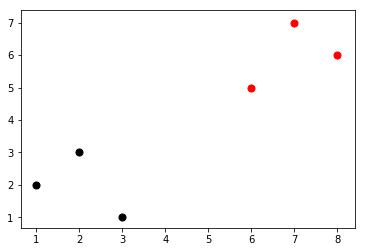

In [5]:
[[plt.scatter(ii[0], ii[1], s = 50, color = i) for ii in dataset[i]] for i in dataset]

### Creación de un for de forma normal...

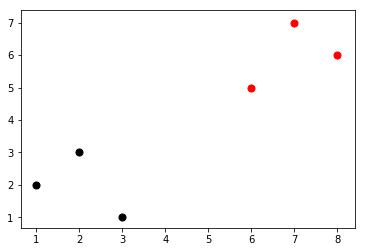

In [6]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0], ii[1], s = 50, color = i)

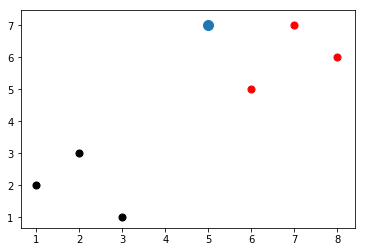

In [8]:
[[plt.scatter(ii[0], ii[1], s = 50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_piont[0], new_piont[1], s = 100)

In [10]:
def k_nearest_neighbors(data, predict, k = 3):
    if len(data) >= k:
        warnings.warn("K es un valor menor que el número total de elementos a votar!!")
    
    distances = []
    for group in data:
        for features in data[group]:
            # El núcleo fundamental de numpy está escrito en c, por lo que es más rápido y eficiente.
            # Esta es la forma en que haríamos para calcular a mano, sin embargo con numpy es más eficiente.
            #d = sqrt((features[0] - predict[0]) ** 2 + (features[1] - predict[1]) ** 2)
            # Implementación del cálculo de la distancia con numpy, no obstante se puede mejorar.
            #d = np.sqrt(np.sum((np.array(features) - np.array(predict)) ** 2))
            # la norma es la distancia.
            d = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([d, group])
    
    print(distances)
    votes = [i[1] for i in sorted(distances)[:k]] # sorted ordena por la primera columna.
    print(votes)
    
    vote_result = Counter(votes).most_common(1)[0][0] # [('r', 2), ('k', 1)]
    
    return vote_result

In [11]:
result = k_nearest_neighbors(dataset, new_piont)

[[6.4031242374328485, 'k'], [5.0, 'k'], [6.324555320336759, 'k'], [2.23606797749979, 'r'], [2.0, 'r'], [3.1622776601683795, 'r']]
['r', 'r', 'r']


In [12]:
def k_nearest_neighbors2(data, predict, k = 3):
    if len(data) >= k:
        warnings.warn("K es un valor menor que el número total de elementos a votar!!")
    
    distances = []
    for group in data:
        for features in data[group]:
            # El núcleo fundamental de numpy está escrito en c, por lo que es más rápido y eficiente.
            # Esta es la forma en que haríamos para calcular a mano, sin embargo con numpy es más eficiente.
            #d = sqrt((features[0] - predict[0]) ** 2 + (features[1] - predict[1]) ** 2)
            # Implementación del cálculo de la distancia con numpy, no obstante se puede mejorar.
            #d = np.sqrt(np.sum((np.array(features) - np.array(predict)) ** 2))
            # la norma es la distancia.
            d = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([d, group])
    
    print(distances)
    votes = [i[1] for i in sorted(distances)[:k]] # sorted ordena por la primera columna.
    print(votes)
    
    vote_result = Counter(votes).most_common(1) 
    print(vote_result)
    
    return vote_result[0][0]   # [('r', 2), ('k', 1)]

In [17]:
new_piont = [3, 4]
result = k_nearest_neighbors2(dataset, new_piont)

[[2.8284271247461903, 'k'], [1.4142135623730951, 'k'], [3.0, 'k'], [3.1622776601683795, 'r'], [5.0, 'r'], [5.385164807134504, 'r']]
['k', 'k', 'k']
[('k', 3)]


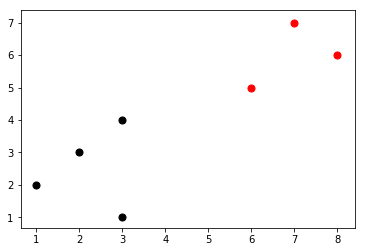

In [18]:
[[plt.scatter(ii[0], ii[1], s = 50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_piont[0], new_piont[1], s = 50, color = result)

In [140]:
def k_nearest_neighbors3(data, predict, k = 3, vervose = False):
    if len(data) >= k:
        warnings.warn("K es un valor menor que el número total de elementos a votar!!")
    
    distances = []
    for group in data:
        for features in data[group]:
            # El núcleo fundamental de numpy está escrito en c, por lo que es más rápido y eficiente.
            # Esta es la forma en que haríamos para calcular a mano, sin embargo con numpy es más eficiente.
            #d = sqrt((features[0] - predict[0]) ** 2 + (features[1] - predict[1]) ** 2)
            # Implementación del cálculo de la distancia con numpy, no obstante se puede mejorar.
            #d = np.sqrt(np.sum((np.array(features) - np.array(predict)) ** 2))
            # la norma es la distancia.
            d = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([d, group])
    
    if vervose:
        print(distances)
    votes = [i[1] for i in sorted(distances)[:k]] # sorted ordena por la primera columna.
    if vervose:
        print(votes)
    
    vote_result = Counter(votes).most_common(1) 
    if vervose:    
        print(vote_result)
    
    return vote_result[0][0]   # [('r', 2), ('k', 1)]

# Aplicando nuestro KNN al Dataset del Cancer...

In [141]:
import pandas as pd

In [142]:
df = pd.read_csv("../../datasets/cancer/breast-cancer-wisconsin.data.txt")
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [143]:
df.replace("?", -9999999, inplace = True)

In [144]:
df.columns = ["name", "v1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "class"]

In [145]:
df.drop(["name"], 1, inplace = True)
df.head()

,v1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [146]:
full_data = df.astype(float).values.tolist()
full_data

[[5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1.0, 2.0, 4.0],
 [6.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1

In [147]:
import random

### Barajar el datasts...

In [148]:
random.shuffle(full_data)

In [149]:
test_size = 0.2

In [150]:
train_set = {2: [], 4: []}
test_set = {2: [], 4: []}

In [151]:
train_data = full_data[:-int(test_size * len(full_data))]
test_data = full_data[-int(test_size * len(full_data)):]

In [152]:
for i in train_data:
    train_set[i[-1]].append(i[: -1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [153]:
train_set

{2: [[1.0, 1.0, 1.0, 1.0, 2.0, 4.0, 1.0, 1.0, 1.0],
  [5.0, 1.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 2.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, -9999999.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [4.0, 3.0, 3.0, 1.0, 2.0, 1.0, 3.0, 3.0, 1.0],
  [2.0, 1.0, 1.0, 2.0, 3.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [4.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 5.0, 5.0, 1.0, 1.0],
  [4.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 1.

In [154]:
correct = 0
total = 0

In [155]:
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors3(train_set, data, k = 10)
        if group == vote:
            correct += 1
        total += 1
print("La eficacia del KNN = ", correct / total)

La eficacia del KNN =  0.9784172661870504
